In [2]:
from google.colab import files
uploaded = files.upload()

Saving data1.csv to data1.csv


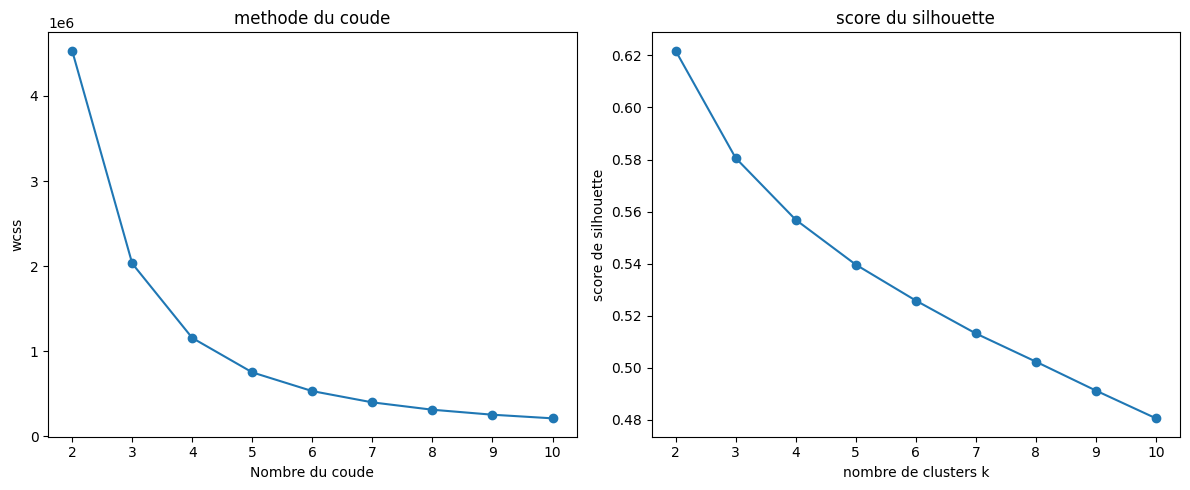

le meilleur k est:  2
vecteures des etiquettes : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv('data1.csv')

wcss = []
silhouette_scores = []

for k in range (2,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data)

  wcss.append(kmeans.inertia_)

  label = kmeans.labels_
  score = silhouette_score(data,label)
  silhouette_scores.append(score)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(2,11), wcss , marker='o')
plt.title("methode du coude")
plt.xlabel("Nombre du coude")
plt.ylabel("wcss")

plt.subplot(1,2,2)
plt.plot(range(2,11), silhouette_scores , marker='o')
plt.title("score du silhouette")
plt.xlabel("nombre de clusters k")
plt.ylabel("score de silhouette")

plt.tight_layout()
plt.show()

best_k = range(2,11)[silhouette_scores.index(max(silhouette_scores))]
print("le meilleur k est: " , best_k)

final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_kmeans.fit(data)

y = final_kmeans.labels_

print('vecteures des etiquettes :', y)
data['Cluster'] = y
print('donnes avec y :')
print(data.head())

In [7]:
from sklearn.model_selection import train_test_split

x = data.drop("Cluster", axis = 1)
y = data["Cluster"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("taille x_train :", x_train.shape)
print("taille x_test :", x_test.shape)
print("taille y_train :", y_train.shape)
print("taille y_test :", y_test.shape)

taille x_train : (420, 3)
taille x_test : (180, 3)
taille y_train : (420,)
taille y_test : (180,)


knn accuracy : 0.9944444444444445
knn classification :               precision    recall  f1-score   support

           0       1.00      0.99      0.99        99
           1       0.99      1.00      0.99        81

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



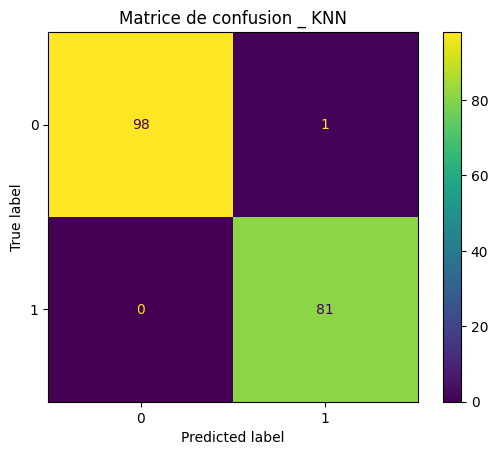

svm accuracy : 0.9888888888888889
svm classification :               precision    recall  f1-score   support

           0       1.00      0.98      0.99        99
           1       0.98      1.00      0.99        81

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



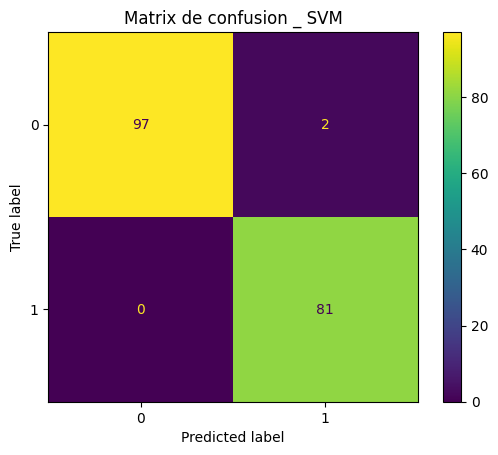

Random Forest Accuracy : 1.0
Random Forest Classifier :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        81

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



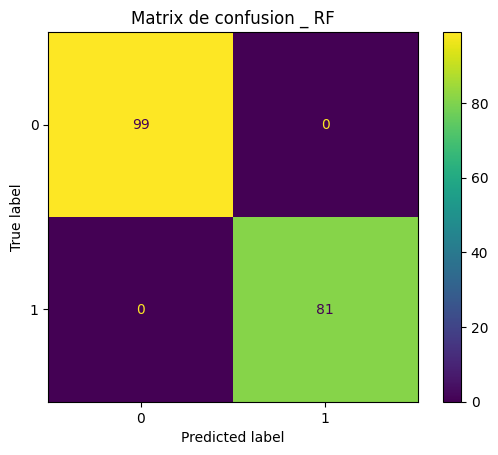

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("knn accuracy :", acc_knn)
print("knn classification :", classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot()
plt.title("Matrice de confusion _ KNN")
plt.show()

svm = SVC(kernel= 'rbf', random_state=42)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("svm accuracy :",acc_svm )
print("svm classification :", classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm).plot()
plt.title("Matrix de confusion _ SVM")
plt.show()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy :", acc_rf)
print("Random Forest Classifier :", classification_report(y_test, y_pred_rf) )
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Matrix de confusion _ RF")
plt.show()